In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


dir = "Data"


In [3]:
def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [5]:
file_paths = {
    'EV Maker by Place': os.path.join(dir, 'EV Maker by Place.csv'),
    'OperationalPC': os.path.join(dir, 'OperationalPC.csv'),
    'Vehicle Class - All': os.path.join(dir, 'Vehicle Class - All.csv'),
    'EV Category 01-24': os.path.join(dir, 'ev_cat_01-24.csv'),
    'EV Sales by Makers and Category 15-24': os.path.join(dir, 'ev_sales_by_makers_and_cat_15-24.csv')
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

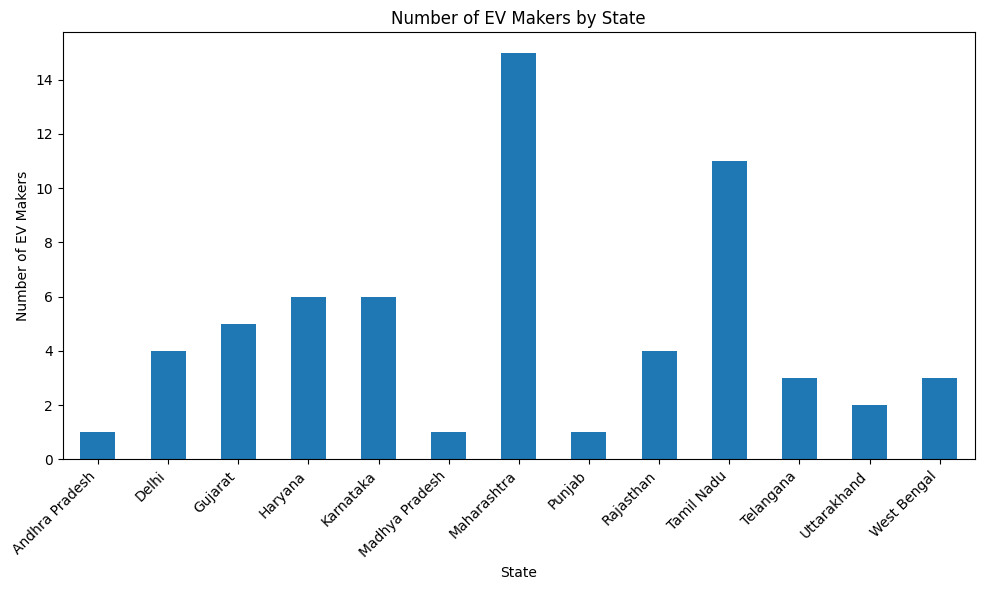

In [6]:
ev_maker_by_place = dataframes['EV Maker by Place'].groupby('State').size()
create_bar_plot(ev_maker_by_place, 'Number of EV Makers by State', 'State', 'Number of EV Makers')

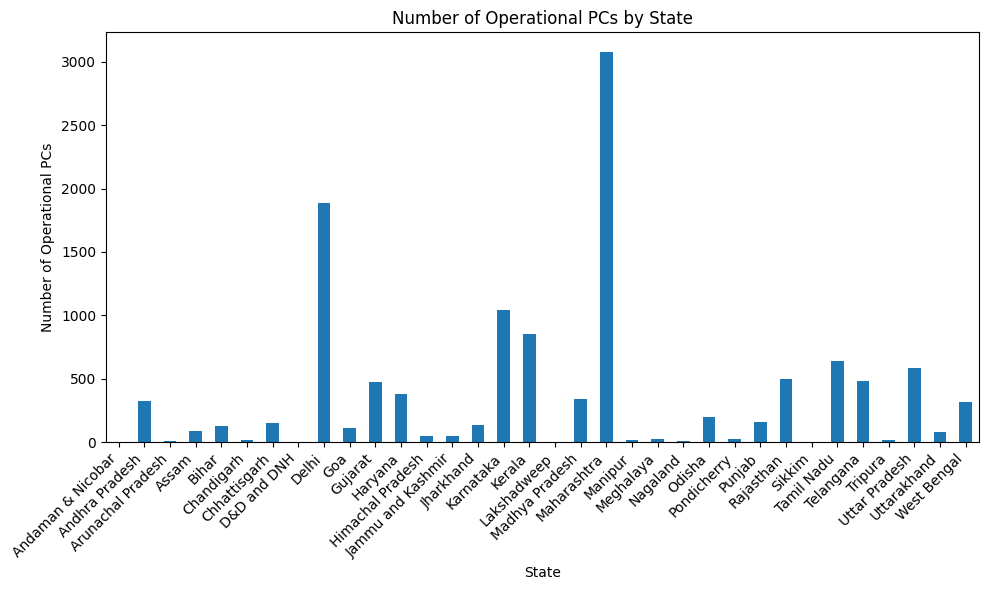

In [7]:
operational_pc = dataframes['OperationalPC'].set_index('State')
create_bar_plot(operational_pc['No. of Operational PCS'], 'Number of Operational PCs by State', 'State', 'Number of Operational PCs')

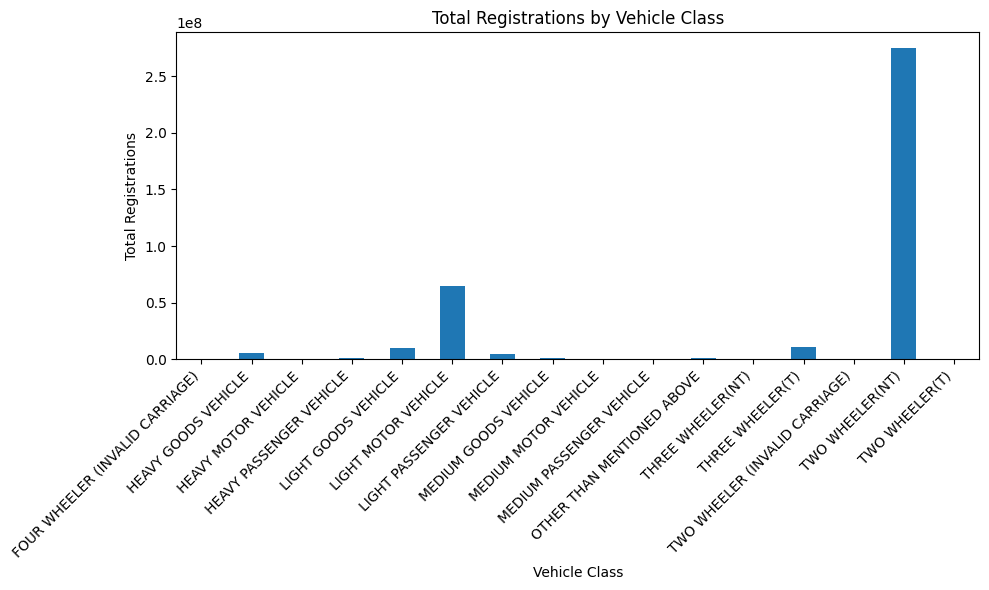

In [8]:
vehicle_class_all = dataframes['Vehicle Class - All'].set_index('Vehicle Class')

# Clean the 'Total Registration' column by removing commas and converting to integers
vehicle_class_all['Total Registration'] = vehicle_class_all['Total Registration'].str.replace(',', '').astype(int)

# Now, let's recreate the bar plot for "Vehicle Class - All"
create_bar_plot(vehicle_class_all['Total Registration'], 'Total Registrations by Vehicle Class', 'Vehicle Class', 'Total Registrations')

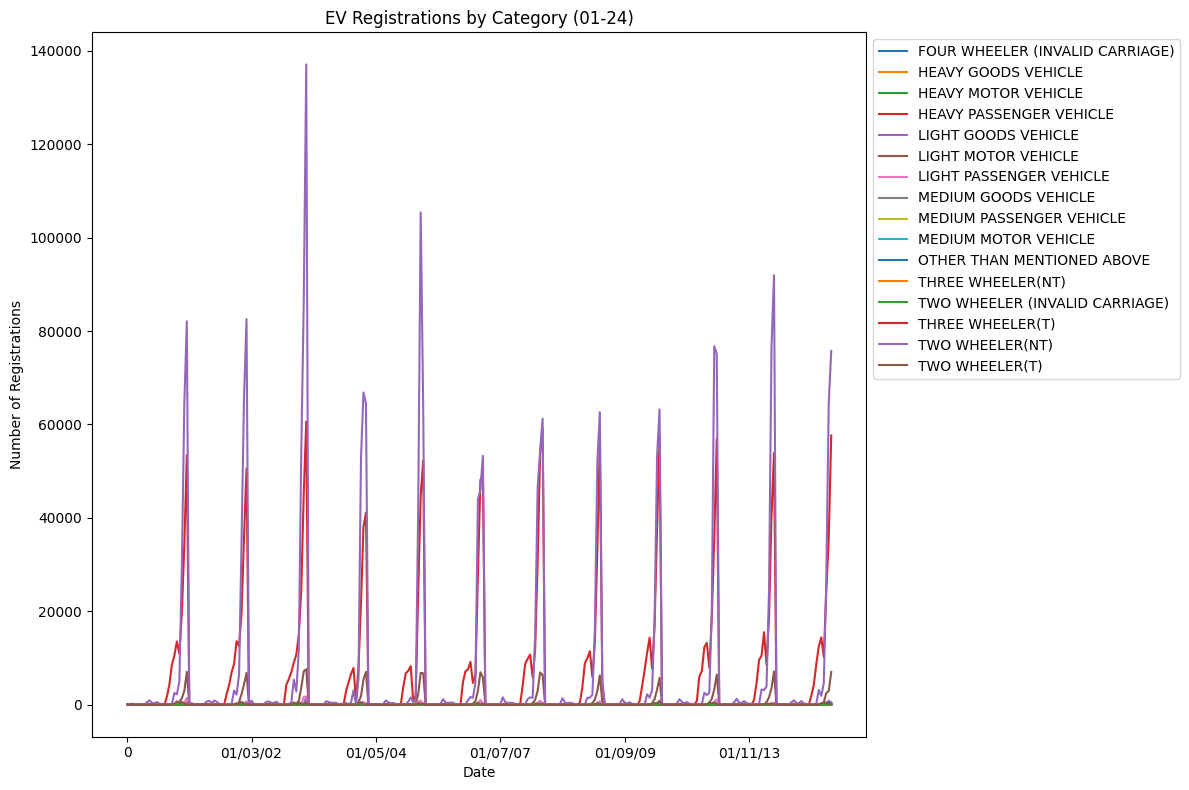

In [9]:
ev_category = dataframes['EV Category 01-24'].set_index('Date')
ev_category.plot(figsize=(12, 8))
plt.title('EV Registrations by Category (01-24)')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

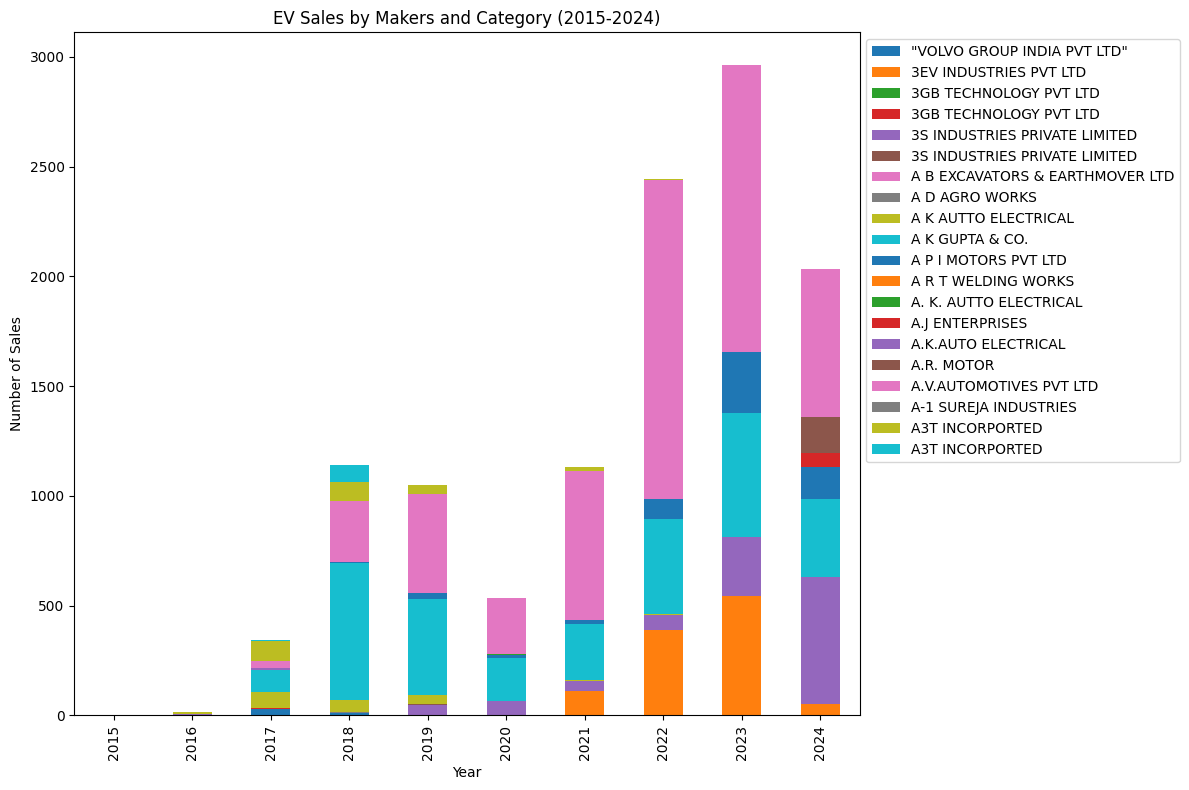

In [10]:
# EV Sales by Makers and Category 15-24 (plotting for top 20 given number of makers)
ev_sales = dataframes['EV Sales by Makers and Category 15-24'].set_index('Maker')[:20]
ev_sales.drop(columns=['Cat'], inplace=True)
ev_sales.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('EV Sales by Makers and Category (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

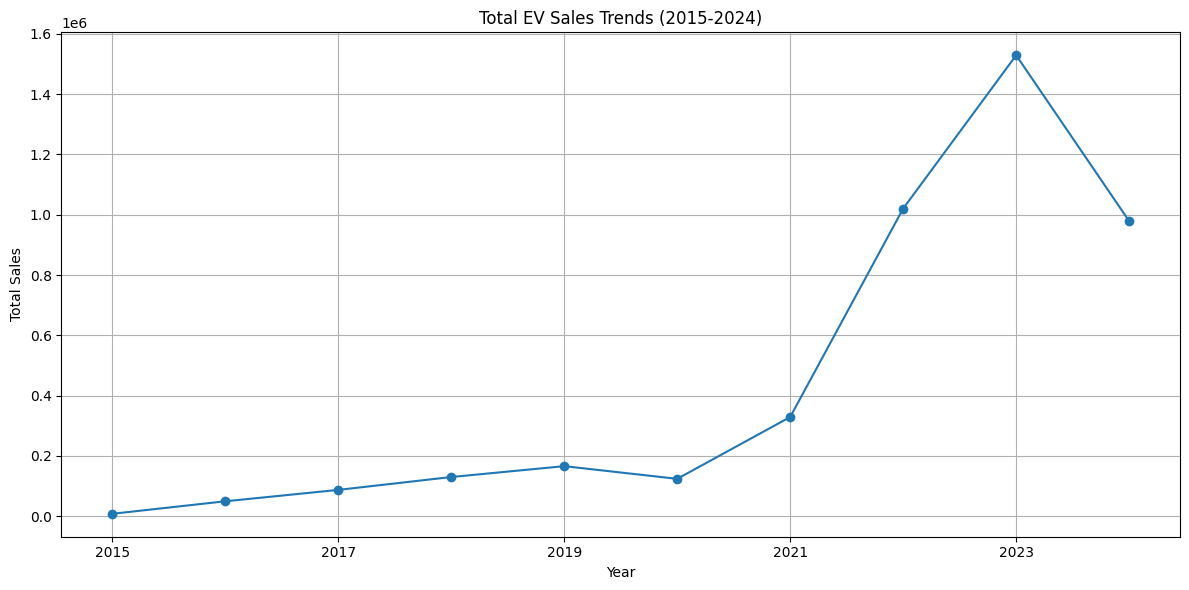

In [11]:
# EV Sales by Makers and Category (2015-2024) - Data Preparation
ev_sales = dataframes['EV Sales by Makers and Category 15-24'].set_index('Maker')
ev_sales.drop(columns=['Cat'], inplace=True)

# Calculate the total sales per year
total_sales_by_year = ev_sales.sum()

# Plot the total EV sales trends over the years
plt.figure(figsize=(12, 6))
total_sales_by_year.plot(marker='o')
plt.title('Total EV Sales Trends (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


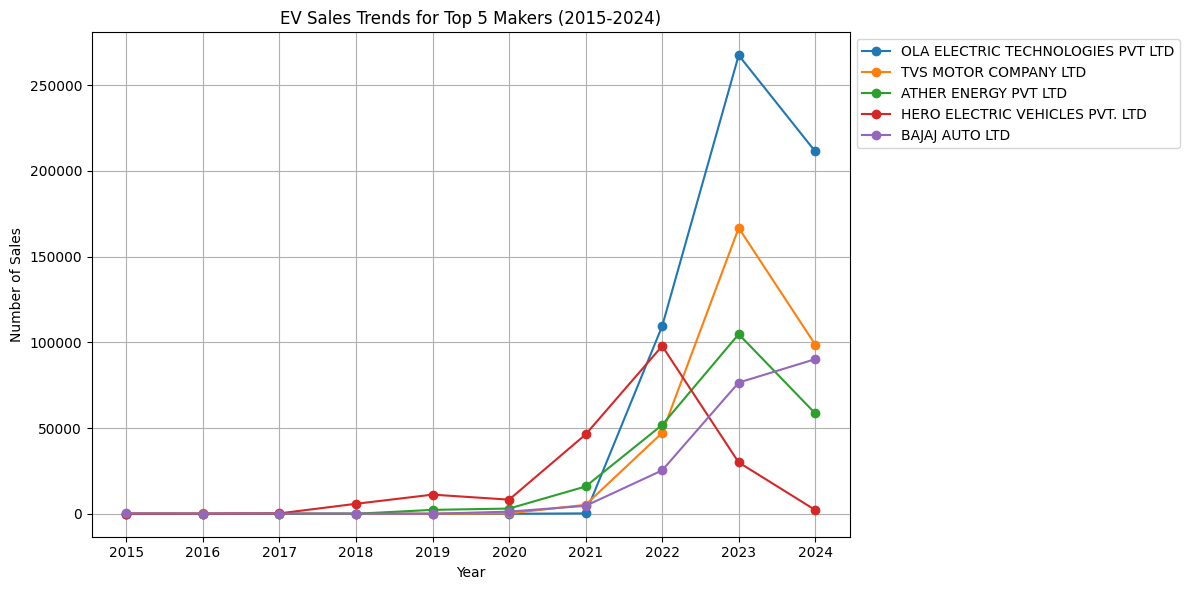

In [12]:
# Consolidate the data by summing sales for makers with duplicate entries
ev_sales_consolidated = ev_sales.groupby(ev_sales.index).sum()

# Re-select the top 5 EV makers based on the consolidated data
top_ev_makers_consolidated = ev_sales_consolidated.sum(axis=1).sort_values(ascending=False).head(5).index
ev_sales_top_makers_consolidated = ev_sales_consolidated.loc[top_ev_makers_consolidated]

# Plot trends for the top 5 EV makers after consolidation
plt.figure(figsize=(12, 6))
for maker in ev_sales_top_makers_consolidated.index:
    plt.plot(ev_sales_top_makers_consolidated.columns, ev_sales_top_makers_consolidated.loc[maker], marker='o', label=maker)

plt.title('EV Sales Trends for Top 5 Makers (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


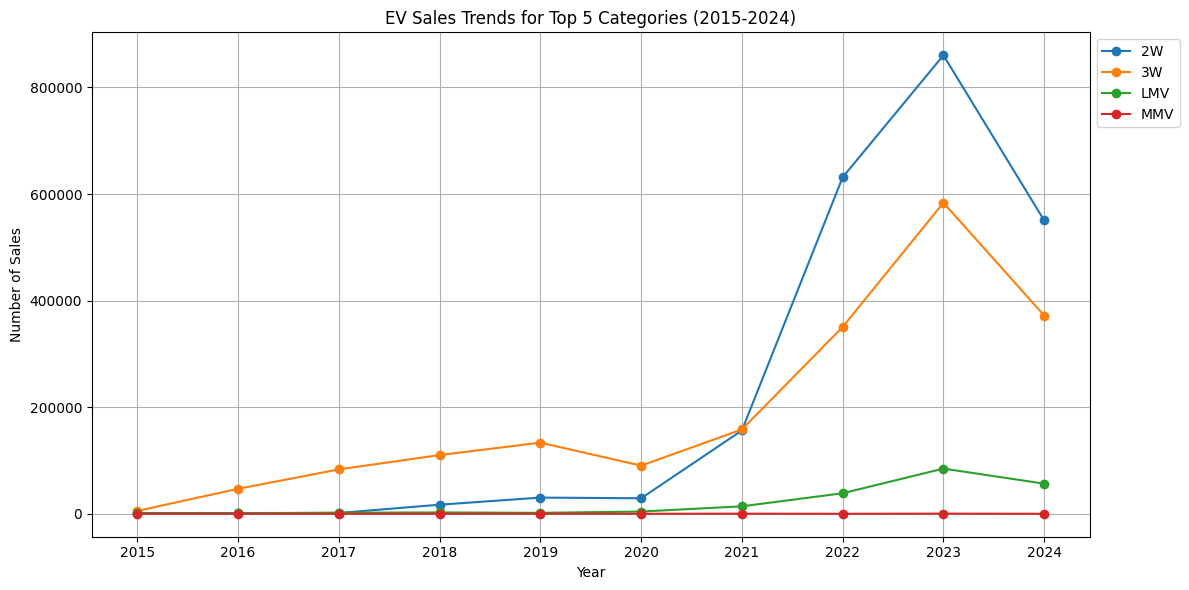

In [13]:
# Select the 'EV Sales by Makers and Category' dataset
ev_sales_cat = dataframes['EV Sales by Makers and Category 15-24']

# Group by 'Cat' to sum up sales across all makers (remove erroneous drop)
ev_sales_by_category = ev_sales_cat.groupby('Cat').sum(numeric_only=True)

# Identify the top 5 categories by total sales
top_5_categories = ev_sales_by_category.sum(axis=1).sort_values(ascending=False).head(5).index

# Extract data for the top 5 categories
ev_sales_top_categories = ev_sales_by_category.loc[top_5_categories]

# Plot the sales trends for the top 5 categories
plt.figure(figsize=(12, 6))
for category in ev_sales_top_categories.index:
    plt.plot(ev_sales_top_categories.columns, ev_sales_top_categories.loc[category], marker='o', label=category)

plt.title('EV Sales Trends for Top 5 Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

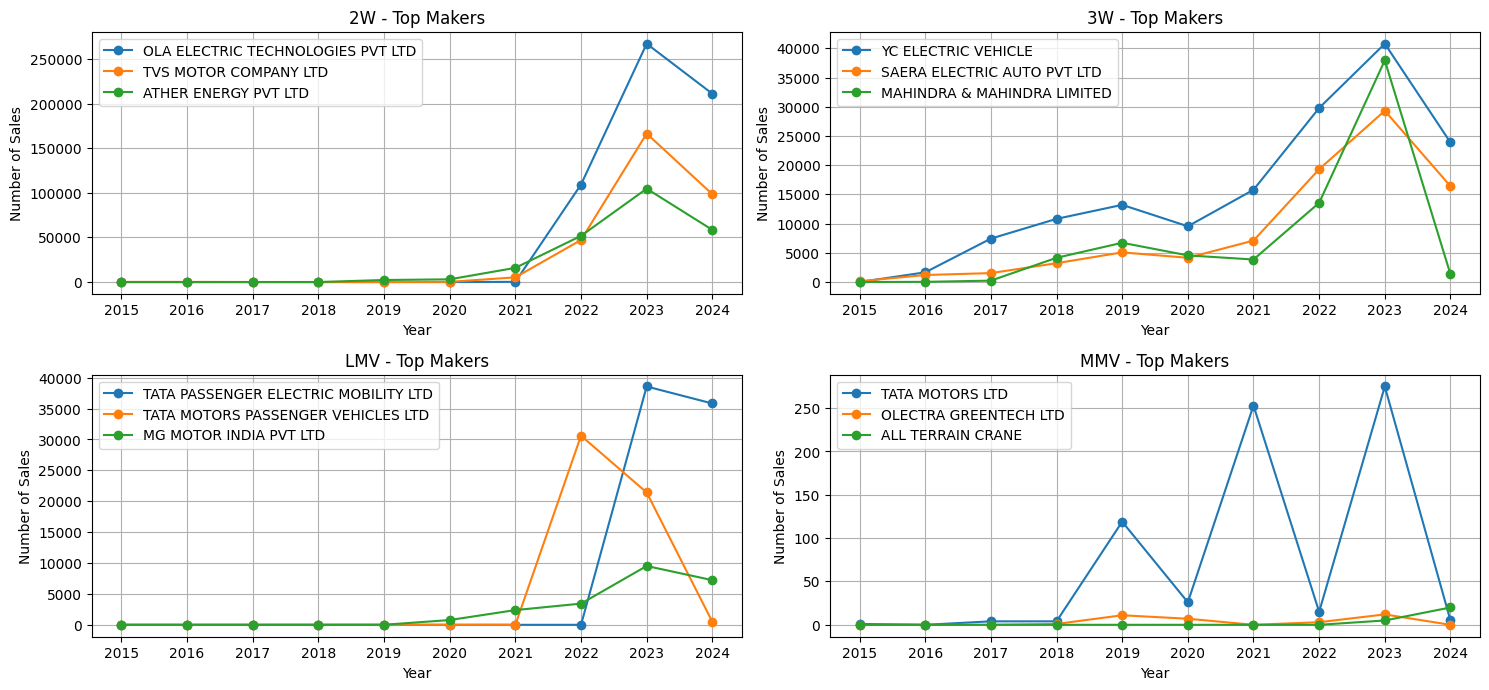

In [14]:
# First, let's identify the top makers within each of the top 5 categories
top_makers_per_category = {}

for category in top_5_categories:
    category_data = ev_sales_cat[ev_sales_cat['Cat'] == category]
    top_makers = category_data.groupby('Maker').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(3).index
    top_makers_per_category[category] = top_makers

# Now, let's plot the sales trends for the top makers within each of these categories
plt.figure(figsize=(15, 10))

for i, (category, makers) in enumerate(top_makers_per_category.items(), 1):
    plt.subplot(3, 2, i)
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        plt.plot(maker_data.columns[2:], maker_data.iloc[0, 2:], marker='o', label=maker)
    plt.title(f'{category} - Top Makers')
    plt.xlabel('Year')
    plt.ylabel('Number of Sales')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


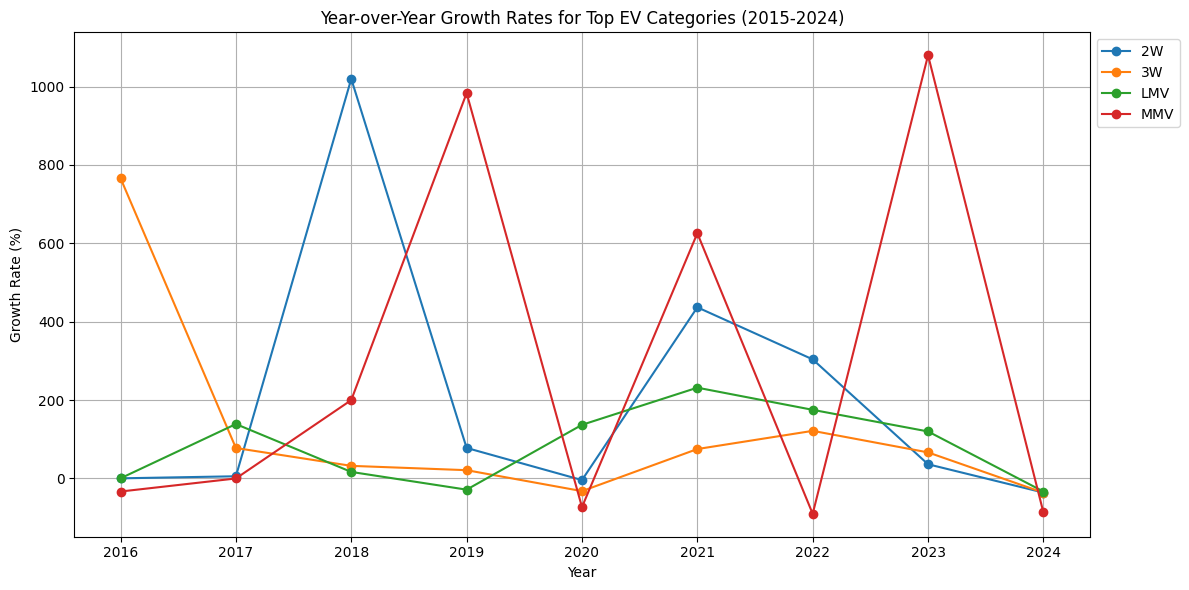

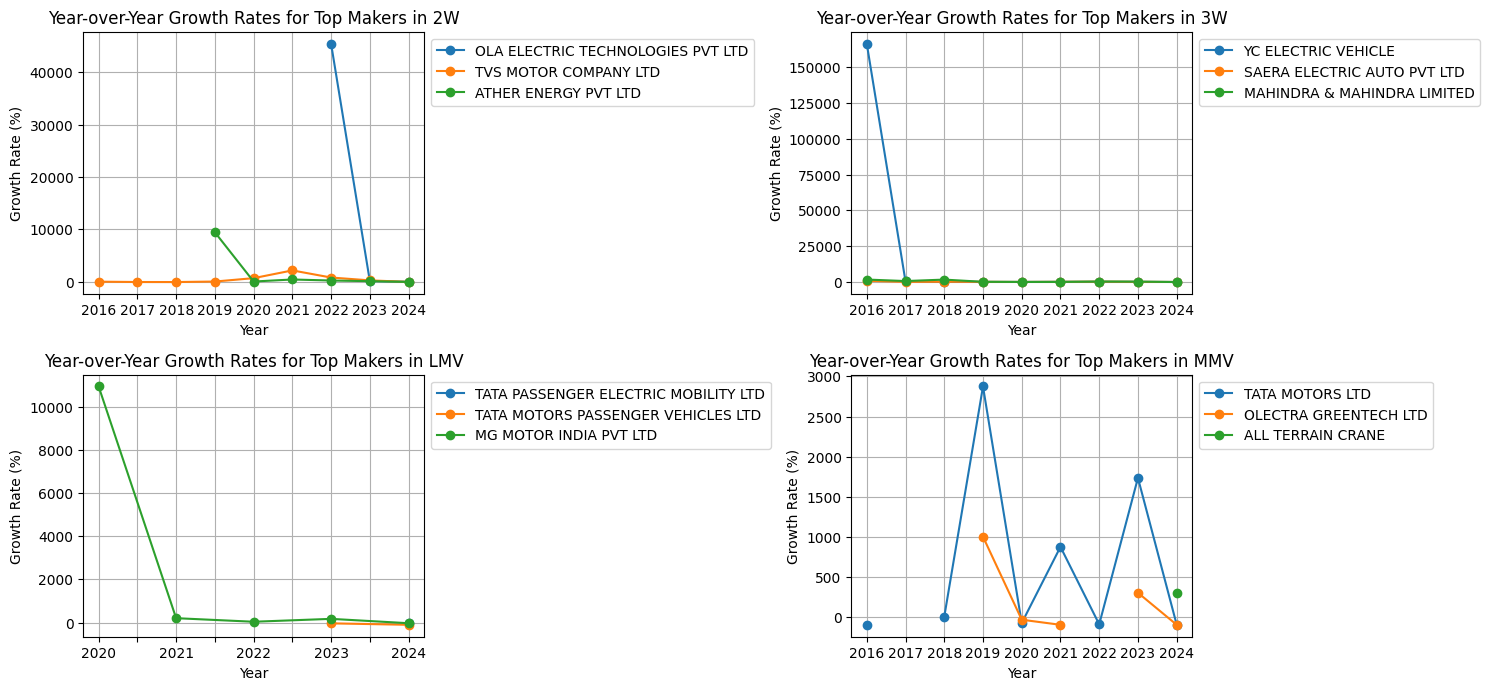

In [15]:
# Calculate year-over-year growth rates for top categories
category_growth_rates = ev_sales_top_categories.pct_change(axis=1) * 100

# Plot growth rates for top categories
plt.figure(figsize=(12, 6))
for category in category_growth_rates.index:
    plt.plot(category_growth_rates.columns, category_growth_rates.loc[category], marker='o', label=category)

plt.title('Year-over-Year Growth Rates for Top EV Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Now calculate year-over-year growth rates for top makers within top categories
maker_growth_rates = {}
for category, makers in top_makers_per_category.items():
    growth_rates = []
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        growth_rate = maker_data.iloc[0, 2:].pct_change() * 100
        growth_rates.append(growth_rate)
    maker_growth_rates[category] = pd.concat(growth_rates, axis=1)
    maker_growth_rates[category].columns = makers

# Plot growth rates for top makers within each category
plt.figure(figsize=(15, 10))

for i, (category, growth_rates) in enumerate(maker_growth_rates.items(), 1):
    plt.subplot(3, 2, i)
    growth_rates.plot(ax=plt.gca(), marker='o')
    plt.title(f'Year-over-Year Growth Rates for Top Makers in {category}')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
de_data = pd.read_csv("Data\Indian automoble buying behavour study.csv")

In [26]:
de_data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,1
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,2
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,1
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,2


In [17]:
de_data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


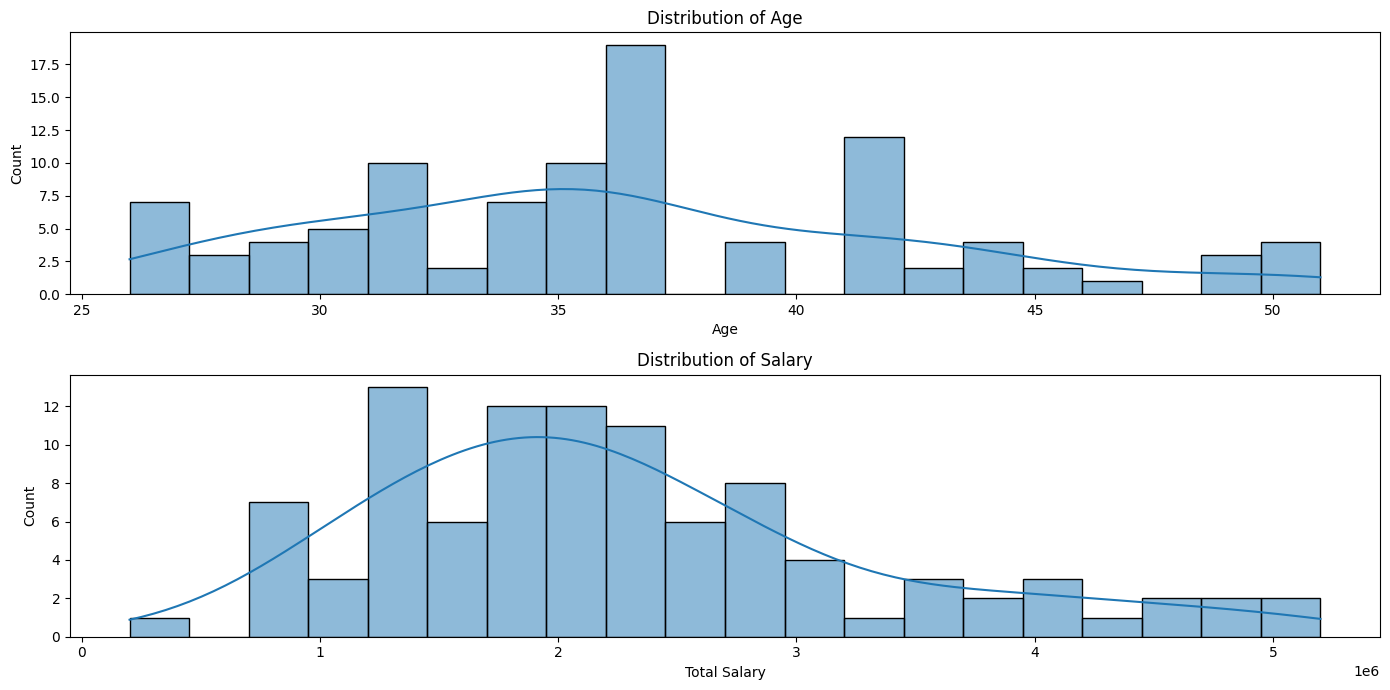

In [27]:
plt.figure(figsize=(14, 7))

# Distribution of Age
plt.subplot(2, 1, 1)
sns.histplot(de_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Salary
plt.subplot(2, 1, 2)
sns.histplot(de_data['Total Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()

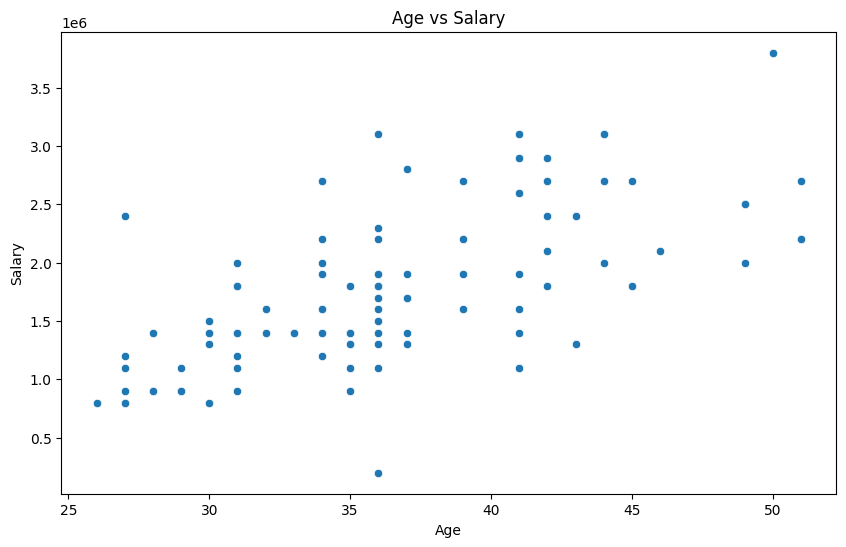

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=de_data)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [21]:
pe_data = pd.read_csv("Data\ev_models.csv")

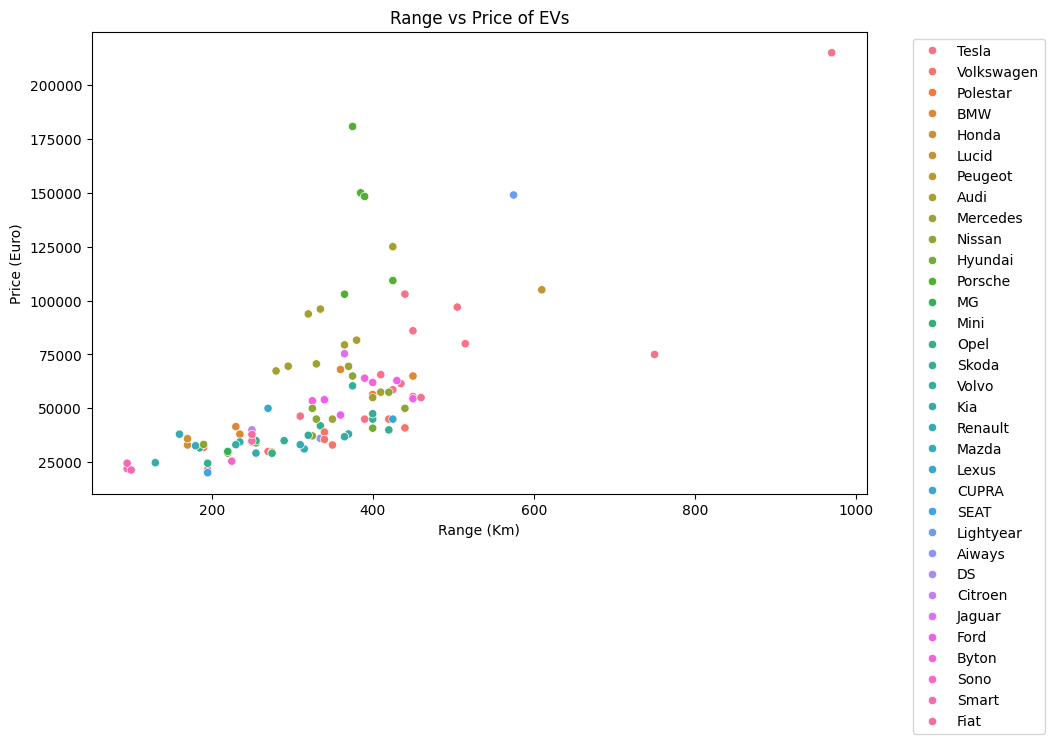

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range_Km', y='PriceEuro', hue='Brand', data=pe_data)
plt.title('Range vs Price of EVs')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

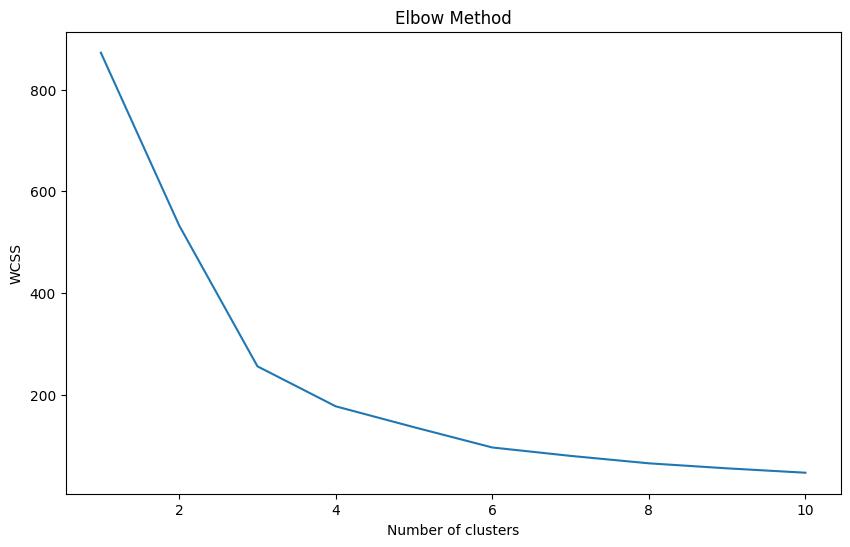

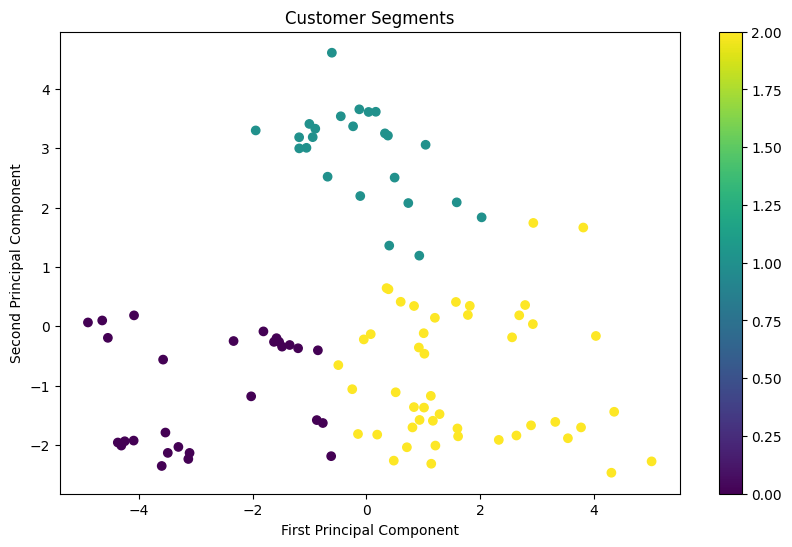

The average silhouette score is: 0.49019348886952613


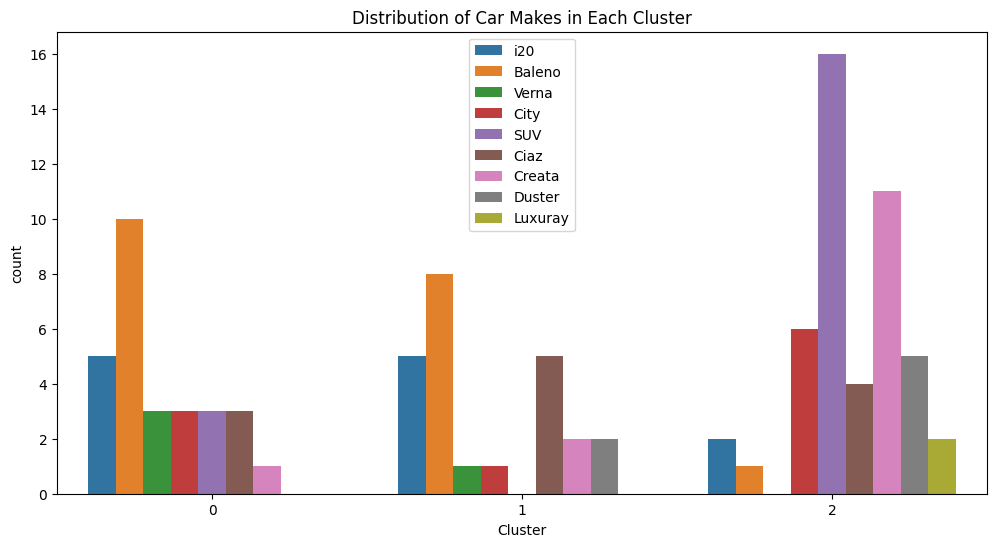

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

numeric_features = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
categorical_features = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']


X_numeric = de_data[numeric_features]
X_categorical = pd.get_dummies(de_data[categorical_features])

X = pd.concat([X_numeric, X_categorical], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Choose the optimal number of clusters (let's say it's 4, but adjust based on the elbow curve)
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)
de_data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()
# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg}")

# Visualize the distribution of car makes in each cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Make', data=de_data)
plt.title('Distribution of Car Makes in Each Cluster')
plt.legend()
plt.show()